## Airplanes Purchase Risk Assessment

### Project Overview

The objective of this analysis is to evaluate and determine low-risk aircrafts to be purchased by our company, Mawingu Group of Companies as we gear towards expanding our portfolio and breaking into the aviation industry.We aim to opeate airplanes for commercial and private enterprises hence we need to determine the potential risks of aircrafts.

This project analyzes aviation accident data from the National Transportation Safety Board, covering civil aviation accidents and selected incidents that occured in the United States and other countries from 1962 to 2023.By extensive data analysis of this dataset, we aim to identify aircrafts with impeccable safety records.

The major focus areas for this analysis will be on quantifiable metrics like aircraft damage, total fatalities in accidents while comparing them to aircraft categories, make and engine types. Ultimately, Mawingu group of companies aims to build a foundation for long-term success in the aviation industry by prioritizing the safety of its crew and customers. 

### Business Problem
Inorder for Mawingu Group of Companies to expand its portfolio into the aviation industry, we have to understand the risks associated with purchasing and operating airplanes for both commercial and private enterprises. Choosing aricraft models know to be safe is not only important for our customers' safety but also for the business's finances and reputation. 

Assessing historical aviation accident data offers a valuable opportunity to identify key trends, patterns and risk factors linked to different airplane models. This data driven approach will enable us to make informed decisions, as we will prioritize aircraft models with proven track records of safety and avoid those with recurring safety issues.

### Data Understanding

The goal is to explore the National Transportation Safety Board data and identify key features that we can use to assess the risks associated with various aircrafts. These include,
1. Make - the manufacturers of the aircrafts
2. Total fatal injuries - the total number of people who died from the accidents 
3. Engine types - the kind of engine each aircraft has
4. Aircraft category - the different kinds of aircrafts available
5. Aircraft damage - the extent of damage to each plane after an accident or incident

In [ ]:
#importing the necessary libraries we shall be using in this project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
#creating two dataframes df and statecodes

df = pd.read_csv("AviationData.csv", encoding='ISO-8859-1', low_memory=False)

state_codes = pd.read_csv("USState_Codes.csv")

In [5]:
state_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [6]:
# get information about the entire dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [7]:
#first 5 rows of the df dataframe
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [8]:
#statistical summary of the entire data frame
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


### Data Cleaning

After exploring the data, I need to clean the data to make it easier to work with. There are columns and rows that might not be useful for our analysis and we are better of dropping them.

#### Dropping Columns

Some columns have alot of missing values. These columns might not be beneficial to us and the best course of action would be to drop them from our data set.

In [9]:
# Normalize the columns 

df.columns = df.columns.str.title().str.replace(".","_" )

In [10]:
#check the number of null values in each column

df.isnull().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport_Code              38640
Airport_Name              36099
Injury_Severity            1000
Aircraft_Damage            3194
Aircraft_Category         56602
Registration_Number        1317
Make                         63
Model                        92
Amateur_Built               102
Number_Of_Engines          6084
Engine_Type                7077
Far_Description           56866
Schedule                  76307
Purpose_Of_Flight          6192
Air_Carrier               72241
Total_Fatal_Injuries      11401
Total_Serious_Injuries    12510
Total_Minor_Injuries      11933
Total_Uninjured            5912
Weather_Condition          4492
Broad_Phase_Of_Flight     27165
Report_Status              6381
Publication_Date          13771
dtype: i

In [11]:
# Drop unnecessary columns - from the previous code we can see columns with a lot of null values
#which we might not necessarily need
df.drop(["Latitude", "Longitude", "Airport_Code", "Airport_Name", "Schedule", "Air_Carrier", "Far_Description", "Publication_Date"], axis = 1, inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event_Id                88889 non-null  object 
 1   Investigation_Type      88889 non-null  object 
 2   Accident_Number         88889 non-null  object 
 3   Event_Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Injury_Severity         87889 non-null  object 
 7   Aircraft_Damage         85695 non-null  object 
 8   Aircraft_Category       32287 non-null  object 
 9   Registration_Number     87572 non-null  object 
 10  Make                    88826 non-null  object 
 11  Model                   88797 non-null  object 
 12  Amateur_Built           88787 non-null  object 
 13  Number_Of_Engines       82805 non-null  float64
 14  Engine_Type             81812 non-null

In [13]:
df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Injury_Severity', 'Aircraft_Damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_Of_Engines', 'Engine_Type',
       'Purpose_Of_Flight', 'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition',
       'Broad_Phase_Of_Flight', 'Report_Status'],
      dtype='object')

#### Dropping Rows

Inasmuch as we ave dropped columns with null values, some of the rows still have alot of missing values. Other rows have irrelevant information that might not be the most important for us when making our recommendations

In [14]:
# drop null values in rows that I think are important
df.dropna(subset=["Aircraft_Category", "Aircraft_Damage", "Engine_Type", "Model", "Make", "Injury_Severity", "Number_Of_Engines","Total_Fatal_Injuries"], inplace=True)

In [15]:
df.shape

(21953, 23)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21953 entries, 7 to 88767
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event_Id                21953 non-null  object 
 1   Investigation_Type      21953 non-null  object 
 2   Accident_Number         21953 non-null  object 
 3   Event_Date              21953 non-null  object 
 4   Location                21953 non-null  object 
 5   Country                 21943 non-null  object 
 6   Injury_Severity         21953 non-null  object 
 7   Aircraft_Damage         21953 non-null  object 
 8   Aircraft_Category       21953 non-null  object 
 9   Registration_Number     21949 non-null  object 
 10  Make                    21953 non-null  object 
 11  Model                   21953 non-null  object 
 12  Amateur_Built           21951 non-null  object 
 13  Number_Of_Engines       21953 non-null  float64
 14  Engine_Type             21953 non-null

#### Checking for invalid characters/values

In [17]:
#convert the event time column to datetime

df["Event_Date"] = pd.to_datetime(df["Event_Date"], errors="coerce")

# extract year from event date column
df["Year"] = df["Event_Date"].dt.year

In [18]:
df.dtypes

Event_Id                          object
Investigation_Type                object
Accident_Number                   object
Event_Date                datetime64[ns]
Location                          object
Country                           object
Injury_Severity                   object
Aircraft_Damage                   object
Aircraft_Category                 object
Registration_Number               object
Make                              object
Model                             object
Amateur_Built                     object
Number_Of_Engines                float64
Engine_Type                       object
Purpose_Of_Flight                 object
Total_Fatal_Injuries             float64
Total_Serious_Injuries           float64
Total_Minor_Injuries             float64
Total_Uninjured                  float64
Weather_Condition                 object
Broad_Phase_Of_Flight             object
Report_Status                     object
Year                               int64
dtype: object

In [19]:
df["Aircraft_Category"].unique()

array(['Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Weight-Shift', 'Powered Parachute',
       'Rocket', 'Blimp', 'WSFT'], dtype=object)

In [20]:
df["Engine_Type"].unique()

array(['Reciprocating', 'Turbo Shaft', 'Unknown', 'Turbo Prop',
       'Turbo Fan', 'Turbo Jet', 'None', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE', 'UNK'], dtype=object)

### Data Visualizations

We will graphically analyze key variables and their relationships to identify risk factors, patterns and trends across the dataset. The desired outcome of this is to deduce clear and actionable insights for Mawingu Group's aviation business decisions.

#### 1. Injury trends over the years for different Aircraft categories

This analysis shows us the trends in injuries for different aircrafts over time. We are able to see,
1. Aircrafts that have had most fatalities
2. Aircrafts that have reduced their fatalities maybe by improving their safety features
3. Years with the most fatalities - we see a significant dip in the number of fatalities in 1985 to 1995 which could be potentially due to safety measure put in place during tha period to curb aviation accidents.
4. The average number of different injuries(fatalities, minor, serious, uninjured) across different aircraft categories. We can see that most aircrafts had fairly more uninjured people than they did fatalities when accidents/incidents ocurred. Blimp and WSFT only had minor injury cases and registered no fatalities


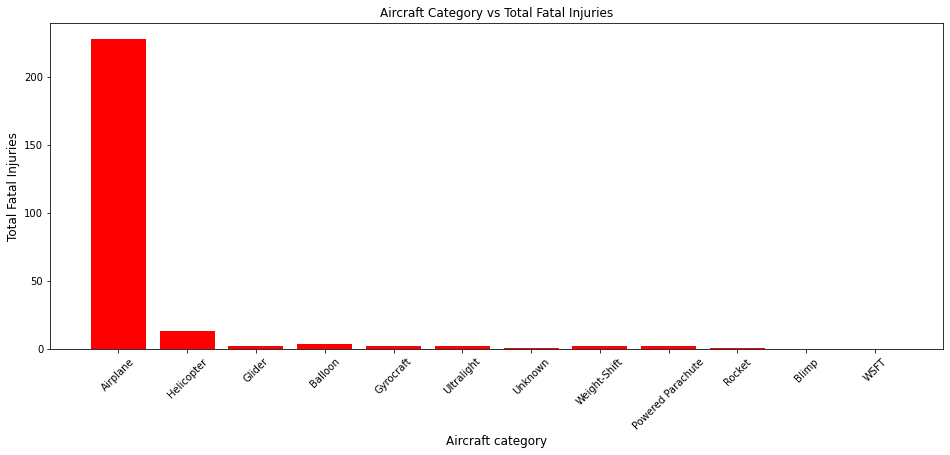

In [21]:
#plot a bar graph to show the relationship between total fatalities and aircraft categories

x = df["Aircraft_Category"]
y= df["Total_Fatal_Injuries"]

plt.figure(figsize=(16, 6))
plt.bar(x, y, color = "red")
plt.xlabel("Aircraft category", fontsize=12)
plt.ylabel("Total Fatal Injuries", fontsize=12)
plt.title("Aircraft Category vs Total Fatal Injuries")
plt.xticks(rotation=45)
plt.show()

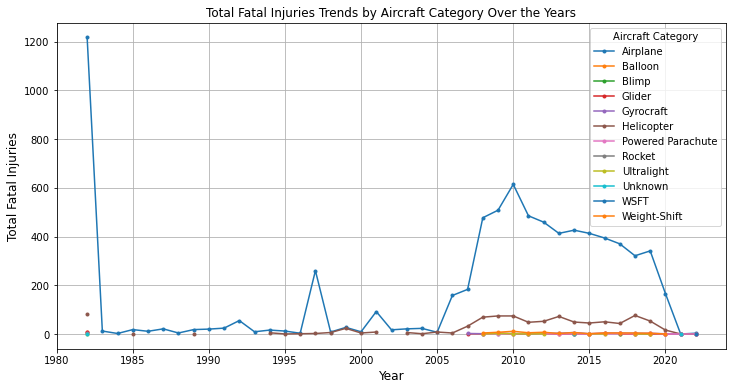

In [22]:
# use groupby for Year and Aircraft category, take fatalities sum
fatalities_trend = df.groupby(["Year", "Aircraft_Category"])["Total_Fatal_Injuries"].sum().unstack()

fatalities_trend.plot(marker=".", figsize=(12,6))
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Fatal Injuries", fontsize=12)
plt.title("Total Fatal Injuries Trends by Aircraft Category Over the Years")
plt.legend(title="Aircraft Category")
plt.grid(True)
plt.show()

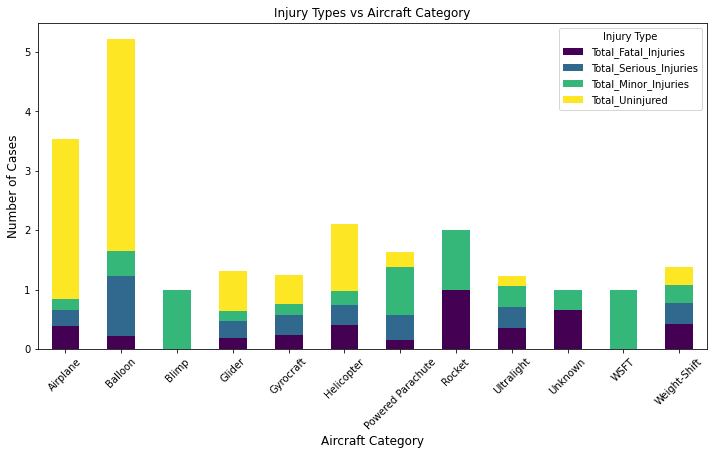

In [40]:
# Grouping data by Aircraft Category and average injuries
df_injuries = df.groupby("Aircraft_Category")[
    ["Total_Fatal_Injuries", "Total_Serious_Injuries", "Total_Minor_Injuries", "Total_Uninjured"]].mean()

# Plot stacked bar chart
df_injuries.plot(kind="bar", stacked=True, figsize=(12, 6), colormap = "viridis")

# Add labels and title
plt.title("Injury Types vs Aircraft Category")
plt.xlabel("Aircraft Category", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.legend(title="Injury Type")
plt.xticks(rotation=45)
plt.show()

#### 2. Comparison between the Make vs the Total Fatal injuries
 
By analyzing the relationship between the make/manufacturer vs average the total fatal injuries, we are able to identify the manufacturers with a history of higher fatalities. This could potentially be due to flaws in their manufacturing or design, or not having proper maintenance or safety procedures.

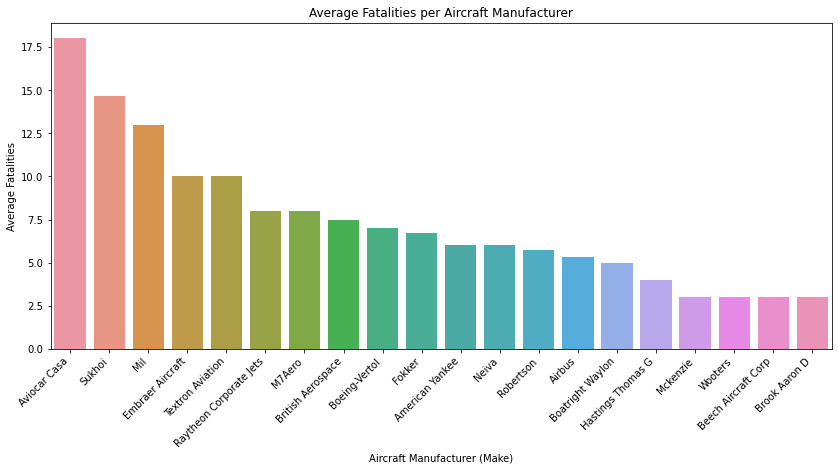

In [31]:
# Normalizing the data in the Make column; some "Makes" were similar but had different spelling 
df["Make"] = df["Make"].str.title()

# Use groupby 'Make' and calculate mean fatalities
make_fatalities = df.groupby("Make")["Total_Fatal_Injuries"].mean().sort_values(ascending=False)

# Select top 20 manufacturers by fatalities(the data set is too large)
top_makes = make_fatalities.head(20)
# Plot the barchart using seaborn
plt.figure(figsize=(14,6))
sns.barplot(x=top_makes.index, y=top_makes.values)
plt.xticks(rotation=45, ha="right")
plt.title("Average Fatalities per Aircraft Manufacturer")
plt.xlabel("Aircraft Manufacturer (Make)")
plt.ylabel("Average Fatalities")
plt.show()

#### 3. Comparison between Engine type and Total fatalities 

This analysis elucidates how the complexity, performance, and operational dangers of various engine types vary. We therefore can identify the engine types that have had the most/least fatalities in the event of an accident by analyzing the average number of fatalities linked to each engine type. Turbo fan engine has the highest average fatalities potentially due to the high operating speeds, increased fire hazards from fuel loads, larger passenger capacity and complex failure risks.

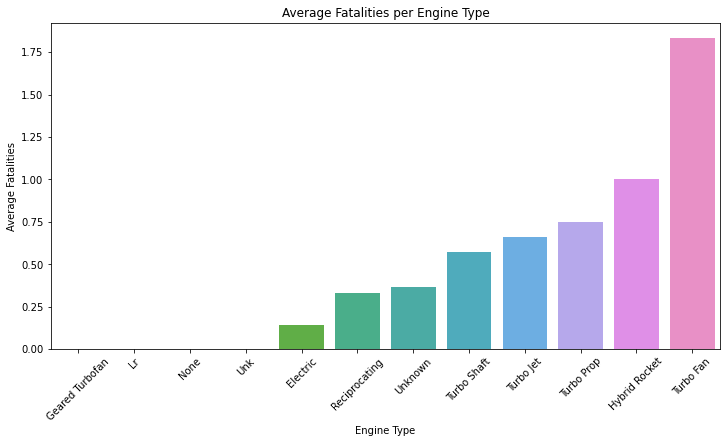

In [25]:
# Normalizing the data in the Engine type column
df["Engine_Type"] = df["Engine_Type"].str.title()

# Use groupby Engine Type and calculate mean fatalities
engine_fatalities = df.groupby("Engine_Type")["Total_Fatal_Injuries"].mean().sort_values(ascending=True)

# Plot the bar chart using seaborn
plt.figure(figsize=(12,6))
sns.barplot(x=engine_fatalities.index, y=engine_fatalities.values)
plt.xticks(rotation=45)
plt.title("Average Fatalities per Engine Type")
plt.xlabel("Engine Type")
plt.ylabel("Average Fatalities")
plt.show()



#### 4. Comparing the Number of engines vs the total fatalities and total uninjured

Typically, multi-engine aircrafts are built for redundancy, which means that even in the event of an engine failure, the remaining engine or engines can still supply sufficient power to enable a safe landing.  On the other hand, since single-engine aircrafts only use one power source, the chances of engine failure are higher. We can determine whether multi-engine aircraft actually provide greater survivability in accidents by examining the relationship between number of engines, total fatalities and total uninjured passengers.

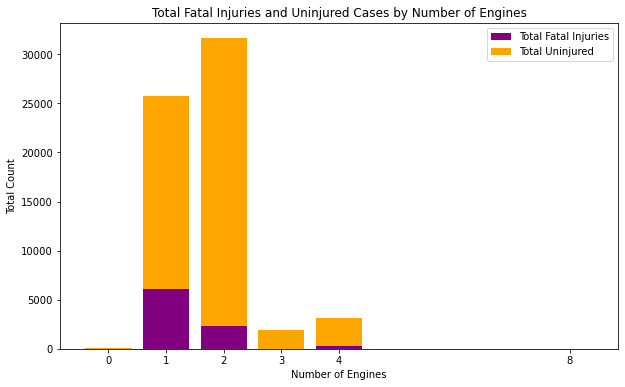

In [26]:
# Use groupby 'Number of Engines' and calculate sum of fatalities & uninjured
df_engines = df.groupby("Number_Of_Engines")[["Total_Fatal_Injuries", "Total_Uninjured"]].sum().reset_index()

# Plot a stacked bar chart
plt.figure(figsize=(10,6))
plt.bar(df_engines["Number_Of_Engines"], df_engines["Total_Fatal_Injuries"], label="Total Fatal Injuries", color="purple")
plt.bar(df_engines["Number_Of_Engines"], df_engines["Total_Uninjured"], bottom=df_engines["Total_Fatal_Injuries"], label="Total Uninjured", color="orange")
plt.xlabel("Number of Engines")
plt.ylabel("Total Count")
plt.title("Total Fatal Injuries and Uninjured Cases by Number of Engines")
plt.xticks(df_engines["Number_Of_Engines"])  # we need to ensure x-axis labels match engine numbers
plt.legend()


# Show plot
plt.show()

#### 5. Relationship between Aircraft category, aircraft damage and injury severity

Analysing the relationship between aircraft damage for different aircrafts and the injury severity experienced during the accidents attempts to justify that aircrafts with minor damage tend to have more uninjured passengers compared to those that are completely destroyed which tend to have more fatalities. Comparing this to different aircraft categories shows aircrafts with better structural integrity thus better survival rates.

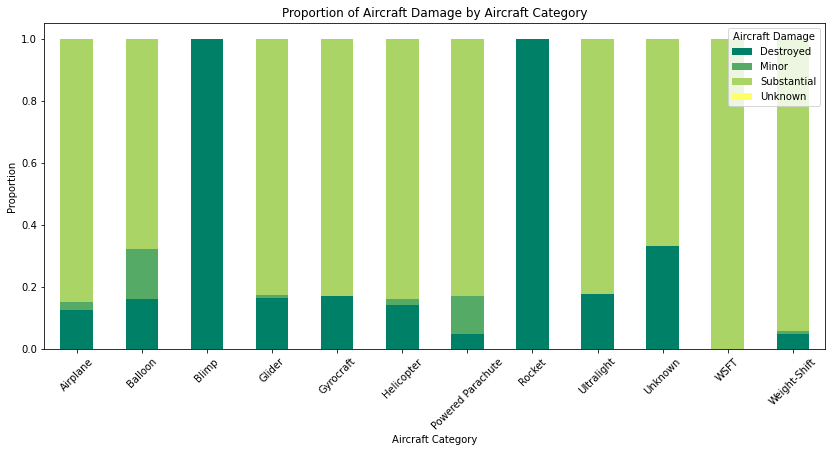

In [37]:
# Group data by Aircraft Category and Aircraft Damage
damage_counts = df.groupby(["Aircraft_Category", "Aircraft_Damage"]).size().unstack()

# Stacked Bar Chart - Proportion of Damage Types per Category
damage_counts_norm = damage_counts.apply(lambda x: x / x.sum(), axis=1)
damage_counts_norm.plot.bar(stacked=True, figsize=(14,6), colormap = "summer")
plt.title("Proportion of Aircraft Damage by Aircraft Category")
plt.xlabel("Aircraft Category")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(title="Aircraft Damage")
plt.show()


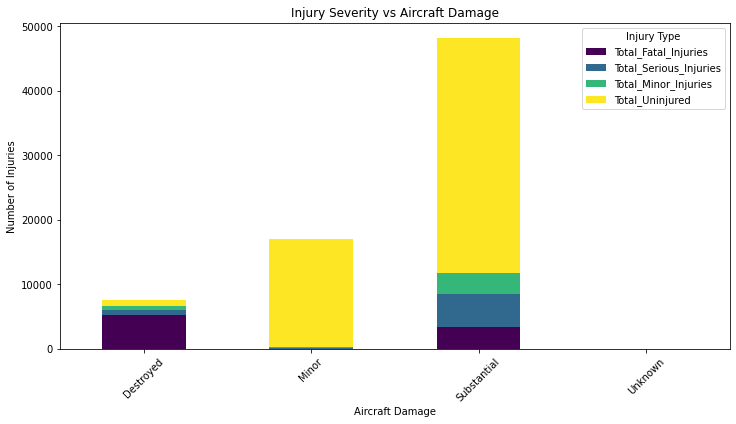

In [ ]:
# Use groupby Aircraft Damage and sum injury types
df_damage_injuries = df.groupby("Aircraft_Damage")[["Total_Fatal_Injuries", "Total_Serious_Injuries", "Total_Minor_Injuries", "Total_Uninjured"]].sum()

# Plot stacked bar chart
df_damage_injuries.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")

plt.title("Injury Severity vs Aircraft Damage")
plt.xlabel("Aircraft Damage")
plt.ylabel("Number of Injuries")
plt.legend(title="Injury Type")
plt.xticks(rotation=45)
plt.show()

#### Correlation matrix

Here we visualize the correlation between numerical columns related to injuries and outcomes, which helps us understand how different injury severities and passenger counts interrelate

In [38]:
correlation_matrix = df.drop(columns=["Year"]).corr()
correlation_matrix

,Number_Of_Engines,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
Number_Of_Engines,1.000000,0.115006,0.048275,0.036886,0.284419
Total_Fatal_Injuries,0.115006,1.000000,0.075549,0.013834,-0.033278
Total_Serious_Injuries,0.048275,0.075549,1.000000,0.387698,0.065501
Total_Minor_Injuries,0.036886,0.013834,0.387698,1.000000,0.041901
Total_Uninjured,0.284419,-0.033278,0.065501,0.041901,1.000000


<AxesSubplot:>

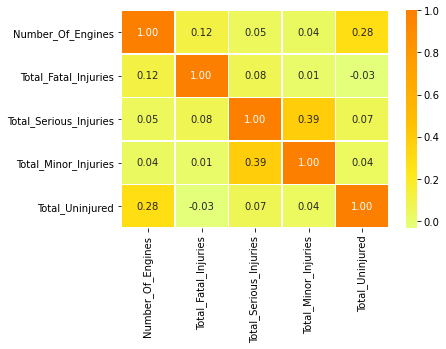

In [39]:
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap ="Wistia", linewidths=0.5)

There is a weak positive correlation between the number of engines of an aircraft vs the type of injury(fatal, minor, serious, uninjured). The relationship is therefore not strong and there are more factors that are in play

### Conclusions

Penetrating into the aviation industry necessitates selecting the right aircarfts that guarantee reliability, operational efficiency and safety. Through this analysis, we have established trends that provide critical insights into how different manufacturers, aircraft types and engine configurations contribute to accident occurances and overall safety. 

One of the key findings is that the type of aircraft and its safety measures are very vital. Inasmuch as most of the aircraft categories were involved in accidents, it is important to note the number of uninjured people was significantly higher in some aircrafts than fatalities. 

Using the event date time, we are able to see total fatalities over the years. We are able to see years that had the least fatalities and do further analysus to understand what safety features were implemented in those years to mitigate accident occurrences.

Lastly, by analysing total fatalities against engine types, we are able to identify engine types deemed to be safer and have less fatalities than others. 


### Recommendations

Based on the analysis, here are my recommendations:
1. Prioritize aircrafts and manufacturers with proven safety records - having analysed the injury severity for different aircrafts, identifying and investing on aircrafts that have higher survival rates and lower fatality rates would ensure safety of the aircraft and the passengers.
2. Ensure aircraft engine safety - inorder to enhance opertaional safety, we need to prioritize engines that have lower fatality rates. We should also ensure regular maintenance activities are conducted to minimize accident risks and ensure they perform at optimum efficiency.
3. Invest in aircrafts with strong structural integrity and minimal damage history - prioritizing aircraft models that have demonstrated less damage in accidents compared to others is key because with strong structural integrity, the severity of injuries is reduced.